In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

Versão de Python Neste Jupyter Notebook: 3.10.5


## Explorando dados

Explorar sondas mais profundas no reino dos dados. Um tópico importante na ciência de dados é a redução de dimensionalidade. Este capítulo toma emprestados dados comuns do Capítulo 5 para demonstrar como isso funciona. Outro tópico é a simulação de velocidade. Ao trabalhar com grandes conjuntos de dados, a velocidade é de grande importância. O big data é explorado com um conjunto de dados popular usado por acadêmicos e pela indústria. Finalmente, o Twitter e a raspagem da Web são duas fontes de dados importantes para exploração.

### Mapas de Calor

Os mapas de calor foram introduzidos no Capítulo 5, mas nenhum foi criado para o conjunto de dados munged. Então, começamos criando uma visualização de mapa de calor dos dados wrangled.json.

1st row in "heat":
{'quan': '2', 'sale': '261.96', 'disc': '0', 'prof': '41.91'}

1st row in "heat" converted to float:
{'quan': 2.0, 'sale': 261.96, 'disc': 0.0, 'prof': 41.91}


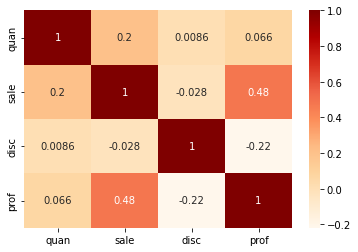

In [4]:
import json, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_json(f):
    with open(f) as f:

        return json.load(f)

def verify_keys(d, **kwargs):
    data = d[0].items()
    k1 = set([tup[0] for tup in data])

    s = kwargs.items()
    k2 = set([tup[1] for tup in s])

    return list(k1.intersection(k2))

    
def build_ls(k, d):

    return [{k: row[k] for k in (keys)} for row in d]

def get_rows(d, n):
    [print(row) for i, row in enumerate(d) if i < n]

def conv_float(d):

    return [dict([k, float(v)] for k, v in row.items()) for row in d]

if __name__ == "__main__":
    f= 'data/wrangled.json'
    data = read_json(f)
    keys = verify_keys(data, 
                       c1 = 'sale',
                       c2 = 'quan',
                       c3 = 'disc',
                       c4 = 'prof')

    heat = build_ls(keys, data)
    print ('1st row in "heat":')
    get_rows(heat, 1)

    heat = conv_float(heat)
    print ('\n1st row in "heat" converted to float:')
    get_rows(heat, 1)

    df = pd.DataFrame(heat)

    plt.figure()
    sns.heatmap(df.corr(), 
                annot = True,
                cmap = 'OrRd')
    plt.show()

O exemplo de código começa importando as bibliotecas json, pandas, matplotlib e seaborn. A função read_json() lê um arquivo JSON. A função Verify_keys() garante que as chaves de interesse existam no arquivo JSON. Isso é importante porque só podemos criar um mapa de calor com base em variáveis numéricas, e os únicos candidatos do arquivo JSON são vendas, quantidade, desconto e lucro. A função build_ls() cria uma lista de elementos do dicionário com base nas variáveis numéricas. A função get_rows() retorna n linhas de uma lista. A função conv_float() converte elementos do dicionário em float. O bloco principal começa lendo o arquivo JSON wrangled.json. Ele continua obtendo chaves apenas para variáveis numéricas. Em seguida, ele cria uma lista de elementos do dicionário (calor) com base nas chaves apropriadas. O código exibe a 1ª linha no calor para verificar se todos os valores são flutuantes. Como não são, o código os converte em float. O código então cria um df de calor e plota o mapa de calor (Figura 6-1).

### Análise do componente principal

A Análise de Componentes Principais (PCA) localiza os componentes principais dos dados. Os componentes principais representam a estrutura subjacente nos dados porque revelam as direções em que os dados têm mais variação (mais espalhados). O PCA utiliza autovetores e autovalores para descobrir a variação de dados. Um autovetor é uma direção, enquanto um autovalor é um número que indica a variação (nos dados) na direção do autovetor. O autovetor com o maior autovalor é o componente principal. Um conjunto de dados pode ser desconstruído em autovetores e autovalores. A quantidade de autovetores (e autovalores) em um conjunto de dados é igual ao número de dimensões. Como o conjunto de dados wrangled.json tem quatro dimensões (variáveis), ele tem quatro autovetores/autovalores

O primeiro exemplo de código executa o PCA no conjunto de dados wrangled.json. No entanto, o PCA funciona apenas com dados numéricos, portanto, o conjunto de dadosé reduzido apenas a esses recursos.

classes in "segm" feature:
['Consumer', 'Corporate', 'Home Office']

Home Office slice: 1783
Consumer slice: 5191
Coporate slice: 3020
sample size: 100


AttributeError: 'DataFrame' object has no attribute 'ix'

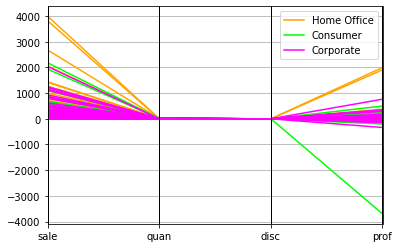

In [5]:
import matplotlib.pyplot as plt, pandas as pd
import numpy as np, json, random as rnd
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

def read_json(f):
    with open(f) as f:

        return json.load(f)

def unique_features(k, d):

    return list(set([dic[k] for dic in d]))

def sire_features(k, d):
    return [{k: row[k] for k in (k)} for row in d]

def sire_numeric(k, d):
    s = conv_float(sire_features(k, d))

    return s

def sire_sample(k, v, d, m):
    indices = np.arange(0, len(d), 1)
    s = [d[i] for i in indices if d[i][k] == v]
    n = len(s)
    num_keys = ['sale', 'quan', 'disc', 'prof']
    
    for i, row in enumerate(s):
        for k in num_keys:
            row[k] = float(row[k])
    
    s = rnd_sample(m, len(s), s)
    
    return (s, n)

def rnd_sample(m, n, d):
    indices = sorted(rnd.sample(range(n), m))
    
    return [d[i] for i in indices]

def conv_float(d):
    
    return [dict([k, float(v)] for k, v in row.items()) for row in d]

if __name__ == "__main__":
    f = 'data/wrangled.json'
    data = read_json(f)
    segm = unique_features('segm', data)
    print ('classes in "segm" feature:')
    print (segm)
    
    keys = ['sale', 'quan', 'disc', 'prof', 'segm']
    features = sire_features(keys, data)
    num_keys = ['sale', 'quan', 'disc', 'prof']
    numeric_data = sire_numeric(num_keys, features)
    
    k, v = "segm", "Home Office"
    m = 100
    s_home = sire_sample(k, v, features, m)
    
    v = "Consumer"
    s_cons = sire_sample(k, v, features, m)
    
    v = "Corporate"
    s_corp = sire_sample(k, v, features, m)
    print ('\nHome Office slice:', s_home[1])
    print('Consumer slice:', s_cons[1])
    print ('Coporate slice:', s_corp[1])
    print ('sample size:', m)
    
    df_home = pd.DataFrame(s_home[0])
    df_cons = pd.DataFrame(s_cons[0])
    df_corp = pd.DataFrame(s_corp[0])
    frames = [df_home, df_cons, df_corp]
    result = pd.concat(frames)
    
    plt.figure()
    
    parallel_coordinates(result, 
                         'segm',
                         color = ['orange','lime','fuchsia'])
    df = pd.DataFrame(numeric_data)
    X = df.ix[:].values
    X_std = StandardScaler().fit_transform(X)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = np.cov(X_std.T)
    print ('\ncovariance matrix:\n', cov_mat)

    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    print ('\nEigenvectors:\n', eig_vecs)
    print ('\nEigenvalues:\n', np.sort(eig_vals)[::-1])
    
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals,
                                             reverse = True)]
    print ('\nvariance explained:\n', var_exp)
    
    corr_mat = np.corrcoef(X.T)
    print ('\ncorrelation matrix:\n', corr_mat)
    
    eig_vals, eig_vecs = np.linalg.eig(corr_mat)
    print ('\nEigenvectors:\n', eig_vecs)
    print ('\nEigenvalues:\n', np.sort(eig_vals)[::-1])
    
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals,
                                             reverse = True)]
    print ('\nvariance explained:\n', var_exp)
    
    cum_var_exp = np.cumsum(var_exp)
    fig, ax = plt.subplots()
    labels = ['PC1', 'PC2', 'PC3', 'PC4']
    width = 0.35
    index = np.arange(len(var_exp))
    ax.bar(index, var_exp,
           color = ['fuchsia', 'lime', 'thistle', 'thistle'])

    for i, v in enumerate(var_exp):
        v = round(v, 2)
        val = str(v) + '%'
        ax.text(i, v+0.5, val, 
                ha = 'center', 
                color = 'b',
                fontsize = 9,
                fontweight = 'bold')
    
    plt.xticks(index, labels)
    plt.title('Variance Explained')
    plt.show()

O exemplo de código começa importando as bibliotecas matplotlib, pandas, numpy, json, random e sklearn. A função read_json() lê um arquivo JSON. A função unique_features() destila categorias únicas (classes) de uma dimensão (feature). Nesse caso, ele destila três classes — Home Office, Corporate e Consumer — do recurso segm. Como o conjunto de dados está próximo a 10.000 registros, eu queria ter certeza de quais classes estão nele. A função sire_features() destila um novo conjunto de dados com apenas recursos de interesse. A função sire_numeric() converte strings numéricas em float. A função sire_sample() retorna uma amostra aleatória de n registros filtrados para uma classe. A função rnd_ sample() cria uma amostra aleatória. A função convert_float() converte dados de string numérica em float.

O bloco principal começa lendo wrangled.json e criando recursos de conjunto de dados apenas com recursos de interesse. O código continua criando um conjunto de dados numérico que inclui apenas recursos com dados numéricos. O numérico do conjunto de dados é usado para gerar o PCA. A seguir, são criadas três amostras de tamanho 100; um para cada classe. As amostras são usadas para criar o visualização de coordenadas paralelas (Figura 6-2). O código para PCA segue padronizando e transformando o conjunto de dados numéricos. Uma matriz de covariância é criada para que autovetores e autovalores possam ser gerados. Eu incluo o PCA usando a matriz de correlação porque algumas disciplinas preferem. Finalmente, uma visualização dos componentes principais é criada.

Coordenadas paralelas mostram que prof (lucro) e sale (vendas) são as características mais importantes. A visualização PCA (Figura 6-3) mostra que o 1º componente principal representa 39,75%, o 2º 26,47%, o 3º 22,03% e o 4º 11,75%. A análise PCA não é muito útil neste caso, pois todos os quatro componentes principais são necessários, especialmente os três primeiros. Portanto, não podemos descartar nenhuma das dimensões da análise futura.

O segundo exemplo de código usa o conjunto de dados de íris para PCA:

In [ ]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
def conv_float(d):
return d.astype(float)
if __name__ == "__main__":
df = pd.read_csv('data/iris.csv')
X = df.ix[:,0:4].values
y = df.ix[:,4].values
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print ('Eigenvectors:\n', eig_vecs)
print ('\nEigenvalues:\n', eig_vals)
plt.figure()
parallel_coordinates(df, 'Name', color=
['orange','lime','fuchsia'])
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals,
reverse=True)]
cum_var_exp = np.cumsum(var_exp)
fig, ax = plt.subplots()
labels = ['PC1', 'PC2', 'PC3', 'PC4']
width = 0.35
index = np.arange(len(var_exp))
ax.bar(index, var_exp,
color=['fuchsia', 'lime', 'thistle', 'thistle'])
for i, v in enumerate(var_exp):
v = round(v, 2)
val = str(v) + '%'
ax.text(i, v+0.5, val, ha='center', color='b',
fontsize=9, fontweight='bold')
plt.xticks(index, labels)
plt.title('Variance Explained')
plt.show()

O exemplo de código é muito mais curto do que o anterior, porque não tivemos que rabiscar, limpar (tanto) e criar amostras aleatórias (para visualização de Coordenadas Paralelas). O código começa importando as bibliotecas matplotlib, pandas, numpy e sklearn. A função conv_float() converte strings numéricas em float. O bloco principal começa lendo o conjunto de dados da íris. Ele continua padronizando e transformando os dados para o PCA. Coordenadas paralelas e variações explicadas são exibidas.

Coordenadas paralelas mostram que PetalLength e PetalWidth são os características mais importantes (Figura 6-4). A visualização PCA (variação explicada) mostra que o 1º componente principal representa 72,77%, o 2º 23,03%, o 3º 3,68% e o 4º 0,52% (Figura 6-5). A análise PCA é muito útil neste caso porque os dois primeiros componentes principais respondem por mais de 95% da variância. Portanto, podemos descartar o PC3 e o PC4 de uma consideração mais aprofundada.

Para maior clareza, o primeiro passo para PCA é explorar os autovetores e autovalores. Os autovetores com os menores autovalores carregam menos informações sobre a distribuição dos dados, então eles podem ser descartados. Neste exemplo, os dois primeiros autovalores são muito maiores, especialmente PC1. A eliminação de PC3 e PC4 está, portanto, em ordem. O 2º passo é medir a variância explicada, que pode ser calculada a partir dos autovalores. A variância explicada nos diz quanta informação (variância) pode ser atribuída a cada um dos componentes principais. Observar a variância explicada confirma que PC3 e PC4 não são importantes.

### Simulação de velocidade

A velocidade na ciência de dados é importante, especialmente à medida que os conjuntos de dados se tornam maiores.  Os geradores são úteis na otimização de memória, porque uma função de gerador retorna um item por vez (conforme necessário) em vez de todos os itens de uma vez.

O exemplo de código compara a velocidade entre uma lista e um gerador:

In [6]:
import json, humanfriendly as hf
from time import clock

def read_json(f):
    with open(f) as f:
        return json.load(f)

def mk_gen(k, d):
    for row in d:
        dic = {}
        for key in k:
            dic[key] = float(row[key])
        yield dic

def conv_float(keys, d):
    return [dict([k, float(v)] for k, v in row.items()
                 if k in keys) for row in d]

if __name__ == "__main__":
    f = 'data/wrangled.json'
    data = read_json(f)
    keys = ['sale', 'quan', 'disc', 'prof']
    print ('create, convert, and display list:')
    start = clock()
    data = conv_float(keys, data)
    for i, row in enumerate(data):
        if i < 5:
            print (row)
    end = clock()
    elapsed_ls = end - start
    print (hf.format_timespan(elapsed_ls, detailed=True))
    print ('\ncreate, convert, and display generator:')
    start = clock()
    generator = mk_gen(keys, data)
    for i, row in enumerate(generator):
        if i < 5:
            print (row)
    end = clock()
    elapsed_gen = end - start
    print (hf.format_timespan(elapsed_gen, detailed=True))
    speed = round(elapsed_ls / elapsed_gen, 2)
    print ('\ngenerator is', speed, 'times faster')

ModuleNotFoundError: No module named 'humanfriendly'

O exemplo de código começa importando as bibliotecas json, humanfriendly e time. Você pode ter que instalar humanfriendly como eu fiz: pip install humanfriendly. A função read_json() lê JSON. A função mk_gen() cria um gerador baseado em quatro recursos de wrangled.json e converte valores em float. A função conv_float() converte valores de dicionário de uma lista em float. O bloco principal começa lendo wrangled. json em uma lista. O código continua cronometrando o processo de criação de uma nova lista de chaves e convertendo valores em float. Em seguida, é criado um gerador que imita o processo de criação e conversão da lista. O gerador é 2,26 vezes mais rápido (no meu computador).

### Big Data

Big data é a moda do século 21. Então, vamos trabalhar com um conjunto de dados relativamente grande. GroupLens é um site que oferece acesso a grandes conjuntos de dados de computação social para teoria e prática. O GroupLens coletou e disponibilizou conjuntos de dados de classificação no site do MovieLens: https://grouplens.org/datasets/movielens/. Vamos explorar o conjunto de dados 1M, que contém aproximadamente um milhão de avaliações de seis mil usuários em quatro mil filmes. eu estava hesitante em disputar, limpar e processar um conjunto de dados de mais de um milhão por causa do poder de processamento limitado do meu PC relativamente novo. O primeiro exemplo de código lê, limpa, dimensiona e despeja dados do MovieLens em JSON:

In [7]:
import json, csv

def read_dat(h, f):
    return csv.DictReader((line.replace('::', ':')
                           for line in open(f)),
                          delimiter=':', fieldnames=h,
                          quoting=csv.QUOTE_NONE)

def gen_dict(d):
    for row in d:
        yield dict(row)

def dump_json(f, l, d):
    f = open(f, 'w')
    f.write('[')
    for i, row in enumerate(d):
        j = json.dumps(row)
        f.write(j)
        if i < l - 1:
            f.write(',')
        else:
            f.write(']')
    f.close()

def read_json(f):
    with open(f) as f:
        return json.load(f)

def display(n, f):
    for i, row in enumerate(f):
        if i < n:
            print (row)
    print()

if __name__ == "__main__":
    print ('... sizing data ...\n')
    u_dat = 'data/ml-1m/users.dat'
    m_dat = 'data/ml-1m/movies.dat'
    r_dat = 'data/ml-1m/ratings.dat'
    unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
    mnames = ['movie_id', 'title', 'genres']
    rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
    users = read_dat(unames, u_dat)
    ul = len(list(gen_dict(users)))
    movies = read_dat(mnames, m_dat)
    ml = len(list(gen_dict(movies)))
    ratings = read_dat(rnames, r_dat)
    rl = len(list(gen_dict(ratings)))
    print ('size of datasets:')
    print ('users', ul)
    print ('movies', ml)
    print ('ratings', rl)
    print ('\n... dumping data ...\n')
    users = read_dat(unames, u_dat)
    users = gen_dict(users)
    movies = read_dat(mnames, m_dat)
    movies = gen_dict(movies)
    ratings = read_dat(rnames, r_dat)
    ratings = gen_dict(ratings)
    uf = 'data/users.json'
    dump_json(uf, ul, users)
    mf = 'data/movies.json'
    dump_json(mf, ml, movies)
    rf = 'data/ratings.json'
    dump_json(rf, rl, ratings)
    print ('\n... verifying data ...\n')
    u = read_json(uf)
    m = read_json(mf)
    r = read_json(rf)
    n = 1
    display(n, u)
    display(n, m)
    display(n, r)

... sizing data ...



FileNotFoundError: [Errno 2] No such file or directory: 'data/ml-1m/users.dat'

O exemplo de código começa importando as bibliotecas json e csv. Função read_dat() lê e limpa os dados (substitui dois-pontos duplos por dois-pontos simples como delimitadores). A função gen_dict() converte uma lista OrderedDict em uma lista de dicionário regular para facilitar o processamento. A função dump_json() é uma função personalizada que escrevi para despejar dados em JSON. A função read_json() lê JSON. A função display() exibe alguns dados para verificação. O bloco principal começa lendo os três conjuntos de dados e encontrando seus tamanhos. Ele continua relendo os conjuntos de dados e despejando em JSON. Os conjuntos de dados precisam ser relidos, porque um gerador só pode ser percorrido uma vez. Como o conjunto de dados de classificação tem mais de um milhão de registros, leva alguns segundos para ser processado.

In [ ]:
import json, numpy as np

def read_json(f):
    with open(f) as f:
        return json.load(f)

def dump_json(f, d):
    with open(f, 'w') as fout:
        json.dump(d, fout)    

def display(n, d):
    [print (row) for i,row in enumerate(d) if i < n]

def get_indx(k, d):
    return [row[k] for row in d if 'null' in row]

def get_data(k, l, d):
    return [row for i, row in enumerate(d) if row[k] in l]

def get_unique(key, d):
    s = set()
    for row in d:
        for k, v in row.items():
            if k in key:
                s.add(v)
    return np.sort(list(s))

if __name__ == "__main__":
    mf = 'data/movies.json'
    m = read_json(mf)
    n = 20
    display(n, m)
    print ()
    indx = get_indx('movie_id', m)
    for row in m:
        if row['movie_id'] in indx:
            row['title'] = row['title'] + ':' + row['genres']
            row['genres'] = row['null'][0]
            del row['null']
        title = row['title'].split(" ")
        year = title.pop()
        year = ''.join(c for c in year if c not in '()')
        row['title'] = ' '.join(title)
        row['year'] = year
    data = get_data('movie_id', indx, m)
    n = 2
    display(n, data)
    s = get_unique('year', m)
    print ('\n', s, '\n')
    rec = get_data('year', ['Assignment'], m)
    print (rec[0])
    rec = get_data('year', ["L'Associe1982"], m)
    print (rec[0], '\n')
    b1, b2, cnt = False, False, 0
    for row in m:
        if row['movie_id'] in ['1001']:
            row['year'] = '1982'
            print (row)
            b1 = True
        elif row['movie_id'] in ['2382']:
            row['title'] = 'Police Academy 5: Assignment: Miami Beach'
            row['genres'] = 'Comedy'
            row['year'] = '1988'
            print (row)
            b2 = True
        elif b1 and b2: break
        cnt += 1
    print ('\n', cnt, len(m))
    mf = 'data/cmovies.json'    
    dump_json(mf, m)
    m = read_json(mf)
    display(n, m)

O exemplo de código começa importando as bibliotecas json e numpy. A função read_json() lê JSON. A função dump_json() salva JSON. A função display() exibe n registros. A função get_indx() retorna índices de elementos do dicionário com uma chave nula. A função get_data() retorna um conjunto de dados filtrado por índices e chave movie_id. A função get_unique() retorna uma lista de valores exclusivos de uma lista de elementos do dicionário. O bloco principal começa lendo filmes.json e exibindo para inspeção. Os registros 12 e 19 têm uma chave nula. O código continua localizando todos os índices movie_id com uma chave nula. As próximas linhas limpam todos os filmes. Aqueles com uma chave nula requerem lógica adicional para serem totalmente limpos, mas todos os registros têm títulos modificados e uma chave de ano novo. Para verificar, os registros 12 e 19 são exibidos. Para ter certeza de que tudo está bem, o código encontra todas as chaves exclusivas com base no ano.

Observe que há dois registros que não têm um ano legítimo. Assim, o código limpa os dois registros. O segundo elif foi adicionado ao código para interromper o processamento assim que os dois registros sujos foram limpos. Embora não esteja incluído no código, verifiquei as chaves movie_id, title e genres, mas não encontrei problemas. O código para se conectar ao MongoDB é o seguinte:

In [ ]:
import json, numpy as np, sys, os, humanfriendly as hf
from time import clock
sys.path.append(os.getcwd()+'/classes')
import conn

def read_json(f):
    with open(f) as f:
        return json.load(f)

def get_column(A, v):
    return [A_i[v] for A_i in A]

def remove_nr(v1, v2):
    set_v1 = set(v1)
    set_v2 = set(v2)
    diff = list(set_v1 - set_v2)
    return diff

def get_info(*args):
    a = [arg for arg in args]
    ratings = [int(row[a[0][1]]) for row in a[2] if row[a[0][0]] == a[1]]
    uids = [row[a[0][3]] for row in a[2] if row[a[0][0]] == a[1]]
    title = [row[a[0][2]] for row in a[3] if row[a[0][0]] == a[1]]
    age = [int(row[a[0][4]]) for col in uids for row in a[4] if col == row[a[0][3]]]
    gender = [row[a[0][5]] for col in uids for row in users if col == row[a[0][3]]]
    return (ratings, title[0], uids, age, gender)

def generate(k, v, r, m, u):
   for i, mid in enumerate(v):
       dic = {}
       rec = get_info(k, mid, r, m, u)
       dic = {'_id':i, 'mid':mid, 'title':rec[1], 'avg_rating':np.mean(rec[0]),
              'n_ratings':len(rec[0]), 'avg_age':np.mean(rec[3]),
              'M':rec[4].count('M'), 'F':rec[4].count('F')}
       dic['avg_rating'] = round(float(str(dic['avg_rating'])[:6]),2)
       dic['avg_age'] = round(float(str(dic['avg_age'])[:6]))
       yield dic

def gen_ls(g):
    for i, row in enumerate(g):
        yield row

if __name__ == "__main__":
    print ('... creating datasets ...\n')
    m = 'data/cmovies.json'
    movies = np.array(read_json(m))
    r = 'data/ratings.json'
    ratings = np.array(read_json(r))
    r = 'data/users.json'
    users = np.array(read_json(r))
    print ('... creating movie indicies vector data ...\n')
    mv = get_column(movies, 'movie_id')
    rv = get_column(ratings, 'movie_id')
    print ('... creating unrated movie indicies vector ...\n')
    nrv = remove_nr(mv, rv)
    diff = [int(row) for row in nrv]
    print (np.sort(diff), '\n')
    new_mv = [x for x in mv if x not in nrv]
    mid = '1'
    keys = ('movie_id', 'rating', 'title', 'user_id', 'age', 'gender')
    stats = get_info(keys, mid, ratings, movies, users)
    avg_rating = np.mean(stats[0])
    avg_age = np.mean(stats[3])
    n_ratings = len(stats[0])
    title = stats[1]
    M, F = stats[4].count('M'), stats[4].count('F')
    print ('avg rating for:', end=' "')
    print (title + '" is', round(avg_rating, 2), end=' (')
    print (n_ratings, 'ratings)\n')
    gen = generate(keys, new_mv, ratings, movies, users)
    gls = gen_ls(gen)
    obj = conn.conn('test')
    db = obj.getDB()
    movie_info = db.movie_info
    movie_info.drop()
    print ('... saving movie_info to MongoDB ...\n')
    start = clock()
    for row in gls:
        movie_info.insert(row)
    end = clock()
    elapsed_ls = end - start
    print (hf.format_timespan(elapsed_ls, detailed=True))

O exemplo de código começa importando json, numpy, sys, os, humanfriendly, time e conn (uma classe personalizada que criei para conectar ao MongoDB). A função read_json() lê JSON. A função get_column() retorna um vetor de coluna. A função remove_nr() remove os valores movie_id que não são classificados. A função get_info() retorna classificações, usuários, idade e sexo como vetores de coluna, bem como o título de um filme. A função é muito complexa, porque cada vetor é criado percorrendo um dos conjuntos de dados e fazer comparações. Para torná-lo mais conciso, a compreensão de lista foi usada extensivamente. A função generate() gera um elemento de dicionário que contém avaliação média, idade média, número de avaliadores masculinos e femininos, número de avaliações, movie_id e título de cada filme. A função gen_ ls() gera cada elemento do dicionário gerado pela função generate().O bloco principal começa lendo os três conjuntos de dados JSON. Ele continua obtendo dois vetores de coluna — cada movie_id do conjunto de dados de filmes e movie_id do conjunto de dados de avaliações. Cada vetor de coluna é convertido em um conjunto para remover duplicatas. Vetores de coluna são usados em vez de registros completos para um processamento mais rápido. Em seguida, um novo vetor de coluna é retornado contendo apenas os filmes classificados. O código continua obtendo vetores de título e coluna para classificações e usuários, idade e sexo para cada filme com movie_ id igual a 1. A classificação média para este filme é exibida com seu título e número de classificações. A parte final do código cria um gerador contendo uma lista de elementos do dicionário. Cada elemento do dicionário contém o id do filme, título, avaliação média, idade média, número de avaliações, número de avaliadores masculinos e número de avaliadores femininos. Em seguida, outro gerador é criado para gerar a lista. A criação dos geradores é instantânea, mas desvendar (desdobrar) o conteúdo leva tempo. Lembre-se de que o primeiro gerador executa bilhões de processos e o segundo gerador executa o primeiro. Portanto, salvar o conteúdo no MongoDB leva cerca de meia hora. Para verificar os resultados, vamos examinar os dados no MongoDB. O comando show collections é o 1º que executo para verificar se a coleção movie_info foi criada:

Em seguida, executo db.movie_info.count() para verificar o número de documentos:

Agora que sei o número de documentos, posso exibir o primeiro e o últimos cinco registros:

A partir da exploração de dados, parece que a coleção movie_info foi criada corretamente.

O quarto exemplo de código salva os três conjuntos de dados — users.json, cmovies. json e ratings.json — para MongoDB:

In [ ]:
import sys, os, json, humanfriendly as hf
from time import clock
sys.path.append(os.getcwd() + '/classes')
import conn

def read_json(f):
    with open(f) as f:
        return json.load(f)

def create_db(c, d):
    c = db[c]
    c.drop()
    for i, row in enumerate(d):
        row['_id'] = i
        c.insert(row)

if __name__ == "__main__":
    u = read_json('data/users.json')
    m = read_json('data/cmovies.json')
    r = read_json('data/ratings.json')
    obj = conn.conn('test')
    db = obj.getDB()
    print ('... creating MongoDB collections ...\n')
    start = clock()
    create_db('users', u)
    create_db('movies', m)
    create_db('ratings', r)
    end = clock()
    elapsed_ls = end - start
    print (hf.format_timespan(elapsed_ls, detailed=True))

O exemplo de código começa importando sys, os, json, humanfriendly, time e custom class conn. A função read_json lê JSON. A função create_db() cria coleções do MongoDB. O bloco principal começa lendo os três conjuntos de dados — users.json, cmovies.json e ratings.json — e salvando-os nas coleções do MongoDB. Como o conjunto de dados ratings.json tem mais de um milhão de registros, leva algum tempo para salvá-lo no banco de dados

O quinto exemplo de código apresenta o pipeline de agregação, que é uma estrutura do MongoDB para agregação de dados modelada no conceito de pipelines de processamento de dados. Os documentos entram em um pipeline de vários estágios que os transforma em resultados agregados. Além de agrupar e classificar documentos por campo ou campos específicos e agregar conteúdo de matrizes, os estágios de pipeline podem usar operadores para tarefas como calcular médias ou concatenar strings. O pipeline fornece agregação de dados eficiente usando operações nativas do MongoDB e é o método preferido para agregação de dados no MongoDB.

In [ ]:
import sys, os
sys.path.append(os.getcwd() + '/classes')
import conn

def match_item(k, v, d):
    pipeline = [ {'$match' : { k : v }} ]
    q = db.command('aggregate',d,pipeline=pipeline)
    return q

if __name__ == "__main__":
    obj = conn.conn('test')
    db = obj.getDB()
    movie = 'Toy Story'
    q = match_item('title', movie, 'movie_info')
    r = q['result'][0]
    print (movie, 'document:')
    print (r)
    print ('average rating', r['avg_rating'], '\n')
    user_id = '3'
    print ('*** user', user_id, '***')
    q = match_item('user_id', user_id, 'users')
    r = q['result'][0]    
    print ('age', r['age'], 'gender', r['gender'], 'occupation',\
          r['occupation'], 'zip', r['zip'], '\n')
    print ('*** "user 3" movie ratings of 5 ***')
    q = match_item('user_id', user_id, 'ratings')
    mid = q['result']
    for row in mid:
        if row['rating'] == '5':
            q = match_item('movie_id', row['movie_id'], 'movies')
            title = q['result'][0]['title']
            genre = q['result'][0]['genres']
            print (row['movie_id'], title, genre)
    mid = '1136'
    q = match_item('mid', mid, 'movie_info')
    title = q['result'][0]['title']
    avg_rating = q['result'][0]['avg_rating']
    print ()
    print ('"' + title + '"', 'average rating:', avg_rating)

O exemplo de código começa importando sys, os e custom class conn. A função match_item() usa o pipeline de agregação para corresponder os registros aos critérios. O bloco principal começa usando o pipeline de agregação para retornar o documento Toy Story da coleção movie_info. O código continua usando o pipeline para retornar o documento do usuário 3 dos usuários da coleção. Em seguida, o pipeline de agregação é usado para retornar todas as classificações de filme de 5 para o usuário 3. Finalmente, o pipeline é usado para retornar a classificação média para Monty Python e o Santo Graal da coleção movie_info. O pipeline de agregação é eficiente e oferece uma vasta gama de funcionalidades. O sexto exemplo de código demonstra um pipeline de agregação de vários estágios:

In [ ]:
import sys, os
sys.path.append(os.getcwd() + '/classes')
import conn

def stages(k, v, r, d):
    pipeline = [ {'$match' : { '$and' : [ { k : v },
                   {'rating':{'$eq':r} }] } },
                 {'$project' : {
                     '_id' : 1,
                     'user_id' : 1,
                     'movie_id' : 1,
                     'rating' : 1 } },
                 {'$limit' : 100}]
    q = db.command('aggregate',d,pipeline=pipeline)
    return q

def match_item(k, v, d):
    pipeline = [ {'$match' : { k : v }} ]
    q = db.command('aggregate',d,pipeline=pipeline)
    return q

if __name__ == "__main__":
    obj = conn.conn('test')
    db = obj.getDB()
    u = '3'
    r = '5'
    q = stages('user_id', u, r, 'ratings')
    result = q['result']
    print ('ratings of', r, 'for user ' + str(u) + ':')
    for i, row in enumerate(result):
        print (row)
    n = i+1
    print ()
    print (n, 'associated movie titles:')
    for i, row in enumerate(result):
        q = match_item('movie_id', row['movie_id'], 'movies')
        r = q['result'][0]
        print (r['title'])

O exemplo de código começa importando sys, os e custom class conn. A função stage() usa um pipeline de agregação de três estágios. A 1ª etapa encontra todas as notas 5 do usuário 3. A 2ª etapa projeta os campos a serem exibidos. A 3ª etapa limita o número de documentos devolvidos. É importante incluir um estágio de limite, porque o banco de dados de resultados é grande e os pipelines têm limitações de tamanho. A função match_item() usa o pipeline de agregação para corresponder os registros aos critérios. O bloco principal começa usando o pipeline stage() para retornar todas as classificações de 5 do usuário 3. O código continua iterando esses dados e usando o pipeline match_item() para obter os títulos que o usuário 3 classificou como 5. O pipeline é um método eficiente para consultar documentos do MongoDB, mas requer prática para se familiarizar com sua sintaxe.

### Twitter

O Twitter é uma fonte fantástica de dados porque você pode obter dados sobre quase tudo. Para acessar os dados do Twitter, você precisa se conectar ao Twitter Streaming API. A conexão requer quatro informações do Twitter: chave de API, segredo de API, token de acesso e segredo do token de acesso (criptografado). Depois de se registrar e obter suas credenciais, você precisa instalar uma API do Twitter. Eu escolhi a API do Twitter TwitterSearch, mas existem muitas outras.

O primeiro exemplo de código cria JSON para armazenar minhas credenciais do Twitter (insira suas credenciais em cada variável):

In [ ]:
import json

if __name__ == '__main__':
    consumer_key = 'qIhSaP3SDMjYTgQSHMnflOte0'
    consumer_secret = '7M4HGS8iPmma0tsC6KGMhqtlR4tDBl1YWPu1UtIMT5mvRNQw35'
    access_token = '3417237687-G6xlBPoHYQclCUhLoULgL6ubwiDjLmFUp1dEEqi'
    access_encrypted = 'zCDKTOHNFa31nBEGOhbttbA5RWX6lw7NR5jDsVJa3d6bh'
    data = {}
    data['ck'] = consumer_key
    data['cs'] = consumer_secret
    data['at'] = access_token
    data['ae'] = access_encrypted
    json_data = json.dumps(data)
    header = '[\n'
    ender = ']'
    obj = open('data/credentials.json', 'w')
    obj.write(header)
    obj.write(json_data + '\n')
    obj.write(ender)
    obj.close()

Eu escolhi salvar as credenciais em JSON para ocultá-las. O código exemplo importa a biblioteca json. O bloco principal salva as credenciais em JSON. O segundo exemplo de código transmite dados do Twitter usando a API TwitterSearch. Para instalar: pip install TwitterSearchAPI.

In [ ]:
from TwitterSearch import *
import json, sys

class twitSearch:
    def __init__(self, cred, ls, limit):
        self.cred = cred
        self.ls = ls
        self.limit = limit
    def search(self):
        num = 0
        dt = []
        dic = {}
        try:
            tso = TwitterSearchOrder()
            tso.set_keywords(self.ls)
            tso.set_language('en')
            tso.set_include_entities(False)
            ts = TwitterSearch(
                consumer_key = self.cred[0]['ck'],
                consumer_secret = self.cred[0]['cs'],
                access_token = self.cred[0]['at'],
                access_token_secret = self.cred[0]['ae']
                )
            for tweet in ts.search_tweets_iterable(tso):
                if num <= self.limit:
                    dic['_id'] = num
                    dic['tweeter'] = tweet['user']['screen_name']
                    dic['tweet_text'] = tweet['text']
                    dt.append(dic)
                    dic = {}
                else:
                    break
                num += 1
        except TwitterSearchException as e:
            print (e)
        return dt

def get_creds():
    with open('data/credentials.json') as json_data:
        d = json.load(json_data)
        json_data.close()
    return d

def write_json(f, d):
    with open(f, 'w') as fout:
        json.dump(d, fout)

def translate():
    return dict.fromkeys(range(0x10000, sys.maxunicode + 1), 0xfffd)

def read_json(f):
    with open(f) as f:
        return json.load(f)

if __name__ == '__main__':
    cred = get_creds()
    ls = ['machine', 'learning']
    limit = 10
    obj = twitSearch(cred, ls, limit)
    data = obj.search()
    f = 'data/TwitterSearch.json'
    write_json(f, data)
    non_bmp_map = translate()
    print ('twitter data:')
    for row in data:
        row['tweet_text'] = str(row['tweet_text']).translate(non_bmp_map)
        tweet_text = row['tweet_text'][0:50]
        print ('{:<3}{:18s}{}'.format(row['_id'], row['tweeter'], tweet_text))
    print ('\nverify JSON:')
    read_data = read_json(f)
    for i, p in enumerate(read_data):
        if i < 3:
            p['tweet_text'] = str(p['tweet_text']).translate(non_bmp_map)
            tweet_text = p['tweet_text'][0:50]
            print ('{:<3}{:18s}{}'.format(p['_id'], p['tweeter'], tweet_text))

O exemplo de código começa importando as bibliotecas TwitterSearch, json e sys. A classe twitSearch transmite dados do Twitter com base nas credenciais do Twitter, uma lista de palavras-chave e um limite. A função get_cred() retorna as credenciais do Twitter do JSON. A função write_json() grava dados em JSON. A função translate() converte dados transmitidos fora do Basic Multilingual Plane (BMP) para um formato utilizável. Emojis, por exemplo, estão fora do BMP. A função read_json() lê JSON. O bloco principal começa obtendo credenciais do Twitter, criando uma lista de palavras-chave de pesquisa e um limite. Nesse caso, a lista de palavras-chave de pesquisa contém máquina e aprendizado, porque eu queria transmitir dados sobre aprendizado de máquina. O limite de dez restringe os registros transmitidos a dez tweets. O código continua gravando dados do Twitter em JSON, traduzindo tweets para controlar dados não BMP e imprimindo o tweet. Por fim, o código lê JSON para verificar se os tweets foram salvos corretamente e imprime alguns.

### Raspagem da web

A raspagem da Web é uma abordagem programática para extrair informações de sites. Ele se concentra na transformação de dados formatados em HTML não estruturados em dados estruturados. A raspagem da Web é programaticamente intensiva devido à natureza não estruturada do HTML. Ou seja, o HTML tem poucas ou nenhuma regra estrutural, o que significa que os padrões estruturais do HTML tendem a diferir de um site para outro. Portanto, prepare-se para escrever um código personalizado para cada aventura de raspagem na Web.

O exemplo de código extrai as informações do livro de uma editora de livros técnicos popular. O primeiro passo é localizar a página da web. O 2º passo é abrir uma janela com o código fonte. A terceira etapa é percorrer o código-fonte para identificar os dados a serem raspados. O 4º passo é raspar. Com o Google Chrome, clique em Mais ferramentas e depois em Ferramentas do desenvolvedor para abra a janela do código-fonte. Em seguida, passe o cursor do mouse sobre a fonte até encontrar os dados. Desça na árvore do código-fonte para encontrar as tags que deseja raspar. Finalmente, raspe os dados.

In [ ]:
from bs4 import BeautifulSoup
import requests, json

def build_title(t):
    t = t.text
    t = t.split()
    ls = []
    for row in t:
        if row != '-':
            ls.append(row)
        elif row == '-':
            break
    return ' '.join(ls)

def release_date(r):
    r = r.text
    r = r.split()
    prefix = r[0] + s + r[1]
    if len(r) == 5:
        date = r[2] + s + r[3] + s + r[4]
    else:
        date = r[2] + s + r[3]
    return prefix, date        

def write_json(f, d):
    with open(f, 'w') as fout:
        json.dump(d, fout)

def read_json(f):
    with open(f) as f:
        return json.load(f)

if __name__ == '__main__':
    s = ' '
    dic_ls = []
    base_url = "https://ssearch.oreilly.com/?q=data+science"
    soup = BeautifulSoup(requests.get(base_url).text, 'lxml')
    books = soup.find_all('article')
    for i, row in enumerate(books):
        dic = {}
        tag = row.name
        tag_val = row['class']
        title = row.find('p', {'class' : 'title'})
        title = build_title(title)
        url = row.find('a', {'class' : 'learn-more'})
        learn_more = url.get('href')
        author = row.find('p', {'class' : 'note'}).text
        release = row.find('p', {'class' : 'note date2'})
        prefix, date = release_date(release)
        if len(tag_val) == 2:
            publisher = row.find('p', {'class' : 'note publisher'}).text
            item = row.find('img', {'class' : 'book'})
            cat = item.get('class')[0]
        else:
            publisher, cat = None, None
            desc = row.find('p', {'class' : 'description'}).text.split()
            desc = [row for i, row in enumerate(desc) if i < 7]
            desc = ' '.join(desc) + ' ...'
        dic['title'] = title
        dic['learn_more'] = learn_more
        if author[0:3] != 'Pub':
            dic['author'] = author
        if publisher is not None:
            dic['publisher'] = publisher
            dic['category'] = cat
        else:
            dic['event'] = desc 
        dic['date'] = date
        dic_ls.append(dic)
    f = 'data/scraped.json'
    write_json(f, dic_ls)
    data = read_json(f)
    for i, row in enumerate(data):
        if i < 6:
            print (row['title'])
            if 'author' in row.keys():
                print (row['author'])
            if 'publisher' in row.keys():
                print (row['publisher'])
            if 'category' in row.keys():
                print ('Category:', row['category'])
                print ('Release Date:', row['date'])
            if 'event' in row.keys():
                print ('Event:', row['event'])
                print ('Publish Date:', row['date'])
            print ('Learn more:', row['learn_more'])
            print ()

O exemplo de código começa importando as bibliotecas BeautifulSoup, request e json. A função build_title() cria dados de título copiados em uma string. A função release_date() cria dados de data raspados em uma string. As funções write_json() e read_json() escrevem e leem JSON respectivamente. O bloco principal começa convertendo a página URL em um objeto BeautifulSoup. O código continua colocando todas as tags de artigo em livros variáveis. Da exploração, descobri que as tags do artigo continham as informações que eu queria coletar. Em seguida, cada tag de artigo é percorrida. A raspagem teria sido muito mais fácil se as informações em cada tag de artigo fossem estruturadas de forma consistente. Como não foi, a lógica para extrair cada informação é extensa. Cada informação é colocada em um elemento do dicionário, que é posteriormente anexado a uma lista. Por fim, a lista é salva em JSON. O JSON é lido e alguns registros são exibidos para verificar se está tudo bem.

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.